# Studying drkN SH3 domain using IDPET package 

In this Jupyter notebook, we will demonstrate how the IDPET package can enhance the analysis of conformational ensembles of disordered proteins, focusing on the specific case of the drkN SH3 domain. Lincoff et al. published an article in 2020 (https://doi.org/10.1038/s42004-020-0323-0) that evaluated the effects of the starting pool of conformations on the final ensemble's features. In summary, they created three different conformation pools: one completely randomly generated using TraDES, one experimentally restrained pool generated via ENSEMBLE, and a third pool comprising an equal mixture of the randomly and experimentally restrained pools. Using their Bayesian-based selection method X-EISD, they derived three different final ensembles. They demonstrated that the ensemble derived from the mixed pool best fit the experimental restraints using multiple experimental data sets. During their analysis, they used the distribution of the radius of gyration and secondary structure propensity plots to trace changes in the different features of these three ensembles.

In this notebook, we will expand on the analysis presented in this paper and provide additional evidence to support their findings using the IDPET package. The analysis will be divided into four main sections:

- Global Analysis
- Local Analysis
- Ensemble Comparison Analysis
- Dimensionality Reduction Analysis

## Global Analysis

In the original paper the only features which were provided to compare **Random**, **Mixed** and **Experimental** ensembles were  *Rg* and *Secondary structure propensities*. Here we not only show how we can easily extract and visualize those features but also we demonstrate other global features to provide more evidences. To do so, we start to load the corresponding ensembles directly from Protein Ensemble Database (PED) using IDPET package. There is no need to download the esnembles from PED manually as the package can handle the downloading using PED API and saving the feature analysis easily based on the directory that you are providing.  

### First step: Importing the modules from IDPET package nad Loading the three ensembles from PED 

In [1]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import

from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ens_codes = [

    Ensemble('PED00156e001', database='ped'), #The ensemble derived from Random pool
    Ensemble('PED00157e001', database='ped'), #The ensemble derived from Experimental pool
    Ensemble('PED00158e001', database='ped')  #The ensemble derived from Mixed pool
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' # Add the path to a directory you wish in order to save the analysis

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories() # load the trajectories which already downloaded from PED for upcoming analysis
vis = Visualization(analysis=analysis) # make the visualization object for visualizing ensemble features  

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


### Second step: visualization of Rg :


In this step we reproduced the data in the paper for analyzing the Rg distribution for each of the ensembles. As it can be concieved from the plots, the final ensembles derived from **Random** (PED00156) pool is more extended due to the lack of secondary structures in its conformers. On the other hand the ensembles extracted from **ENSEMBLE** (PED00157) pool and **MIXED** (PED00158) pool is more compacted. In this part using the IDPET package the Rg distributions are visualized using simple histograms and violin plots.  

/home/hamid/Desktop/EnsembleTools/dpet/visualization.py:1178: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


array([<Axes: title={'center': 'PED00156e001'}, xlabel='Radius of Gyration [nm] (Rg)', ylabel='Density'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='Radius of Gyration [nm] (Rg)'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='Radius of Gyration [nm] (Rg)'>],
      dtype=object)

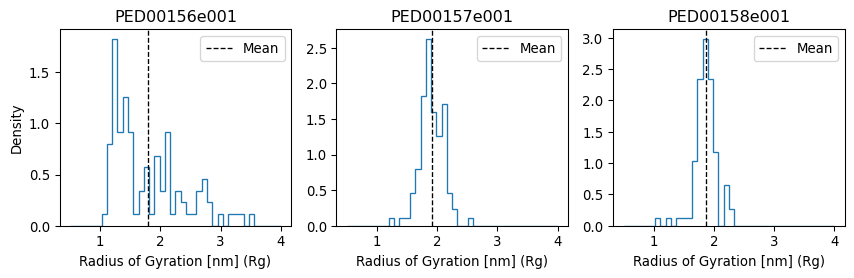

In [37]:
vis.radius_of_gyration(multiple_hist_ax=True ,hist_range=(0.5,4) ,means=True, median=False, bins=40)

<Axes: title={'center': 'Radius of Gyration'}, ylabel='Radius of Gyration [nm] (Rg)'>

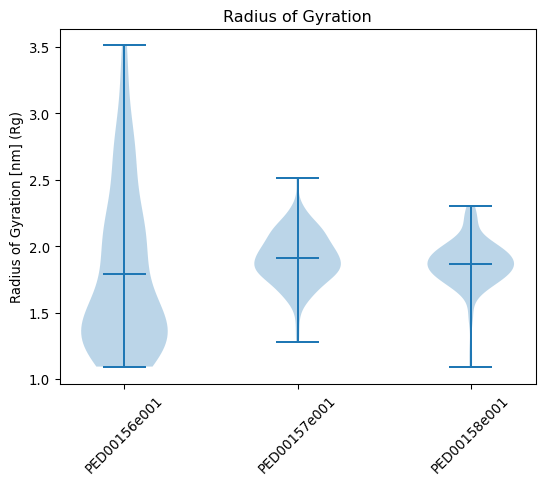

In [26]:
vis.radius_of_gyration(violin_plot=True, means=True, median=False)

### Third step: Visualization and calculation of other global features:

Here we will visualize other feature based on the PED entries of these three ensembles using IDPET package. 
- End to end distances
- Global SASA
- Asphericity 
- Prolateness
- Rg vs Asphericity  

#### End to end distances: 
Here we demonstrated end-to-end distance distributions. Since there is a high correlation between Rg and end-to-end distances, we can see that the distributions are almost the same as those we had for Rg.

<Axes: title={'center': 'End-to-End distances distribution'}, ylabel='End-to-End distance [nm]'>

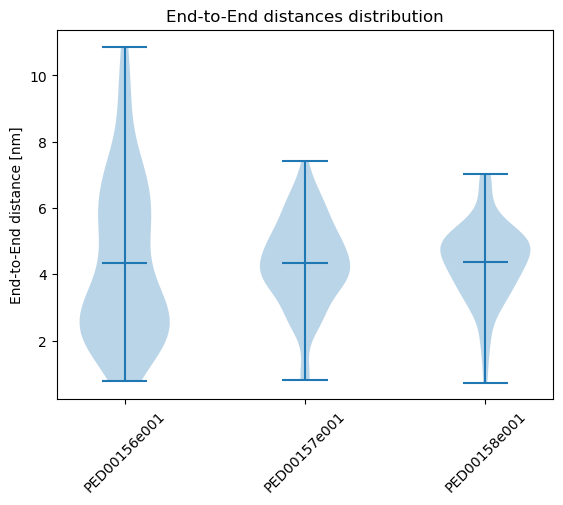

In [27]:
vis.end_to_end_distances(means=True, median=False)

#### Solvent Accessible Surface Area: 
Using the algorithm from Shrake and Rupley implemented in mdtraj library we can calculate SASA for each atom in each conformation; then we can sum over all of the atoms to get the total SASA for each conformation and plot the distribution of global SASA over each ensembles. Again we can see a direct correlation of the Rg with SASA here. While for the **Random** (PED00156) we have an extended distribution and higher mean for global SASA; for **ENSEMBLE** and **Mixed** (PED00157-8) ensembles we have more narrower distributions. This can be also correlated to lower amount of secondry structure elements in random ensemble respect to the others. This can also reveal the fact that how ENSEMBLE method is highly biased towards experimental data such as NMR while the random ensemble has shown higher degree of freedom.    


<Axes: title={'center': 'SASA distribution over the ensembles'}, ylabel='SASA (nm$^2$)'>

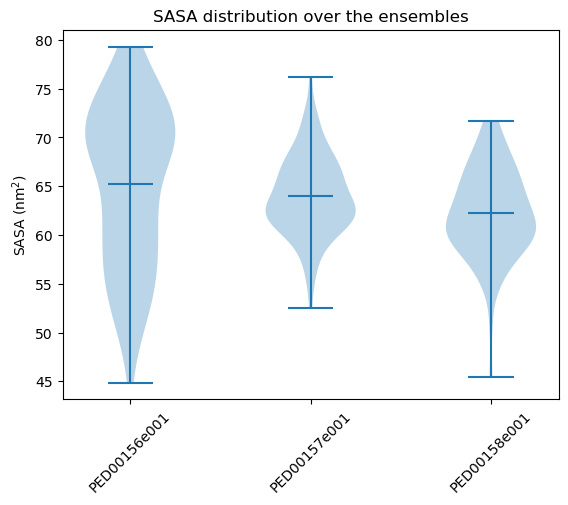

In [28]:
vis.ensemble_sasa(means=True, medians=False)

#### Asphericity: 
Using the gyration tensor we can quantify asphericity which measures the degree to which chain shape deviates from that of a perfect sphere. For a perfect sphere asphericity is 0 and for a perfect rod it is equal to 1. Here we can see again how **Random** (PED00156) ensemble has expanded ditribution in terms of asphericity from almost sphere shaped confomration to perfect rod. On the other hand this distribution is narrower for others (PED00157) and (PED00158)

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

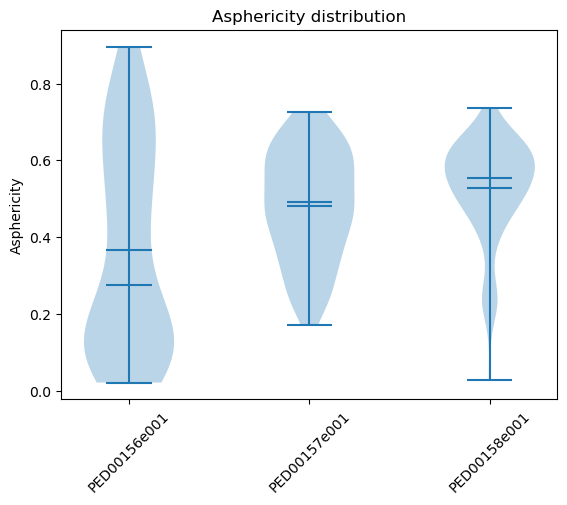

In [29]:
vis.asphericity()

#### Correlation between Rg & Asphericity: 
The correlation between Rg and Asphericity is another intersting index which could be analyzed. For the **Random** ensemble (PED00156) we can see a high positive correlation between Rg and asphericity which means as the molecule become more extended, it tends to be more elongated or non-spherical. This is true specifically in cases which proteins lack secondary structures. On the other hand the correlation for (PED00157) is weaker as it has higher amount of scondary structe and the **Mixed** ensemble stays in between.

Pearson coeff for PED00156e001 = 0.934
Pearson coeff for PED00157e001 = 0.303
Pearson coeff for PED00158e001 = 0.506


<Axes: xlabel='Radius of Gyration (Rg) [nm]', ylabel='Asphericity'>

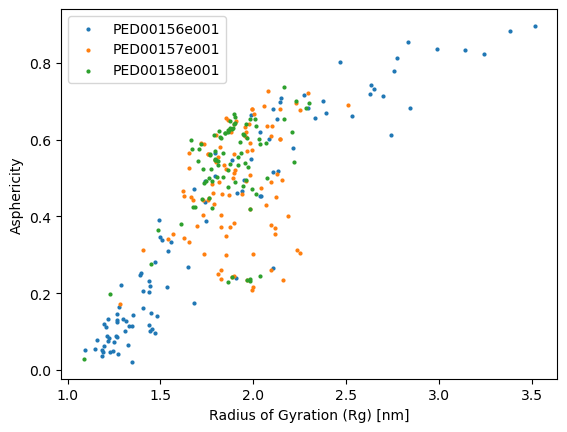

In [30]:
vis.rg_vs_asphericity()

#### Flory exponent analysis:

In the scaling relationship between Rg and the chain length ($\langle R_g \rangle = R_0 N^\nu$), $\nu$ is the Flory exponent which describes how the radius of gyration ($\langle R_g \rangle$) of a polymer chain scales with its chain length ($N$) in a particular solvent environment. While a higher $\nu$ value typically suggests a more extended conformation, indicating that the protein chain is more flexible and less restricted in its conformational space. Conversely, a lower 
$\nu$ value implies a more compact conformation, which could indicate more restricted or ordered structure. Therfore, we calculate flory exponent for the ensembles using the IDPET and we can confirm that regardless of ($\langle R_g \rangle$) the **Random** ensembl has the most extended conformations based on polymer physics, while the other two ensembles due to having some extent of secondary structures have a lower flory exponent. 

In [39]:
v_values = analysis.get_features("flory_exponent")
print(v_values)


{'PED00156e001': 0.6002317122899954, 'PED00157e001': 0.5550028361544492, 'PED00158e001': 0.5729228399027954}


## Local Analysis:

In this part we first reproduced the plots for visualizing the content of secondary structure propensities like in the original paper and then we will represent other local features such as :
- Site-specific flexibility parameter  
- 2D Ramachandran histograms
- Alpha anlge distributions 
  

#### Secondary structure propensity plot: 
Using this function, you will be able to easily plot the content of secondary structure propensity fore each residue. You can choose three different dssp_code. H is for all types of helices, C for coils and E for all types of strands. This plot clearly shows the huge differences between the amount of helix content beween PED00156, PED00157 and PED00158 in specific positions of the protein like between residue 16-20, 30-45 and 50-55. 

<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of Helix'>

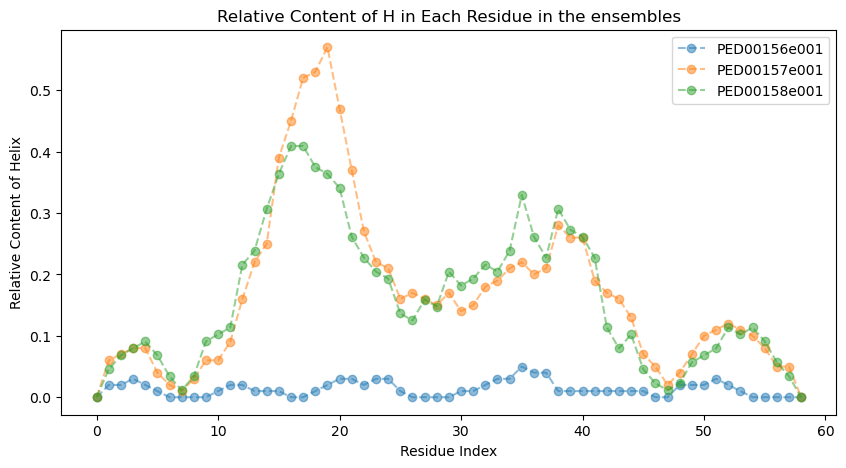

In [32]:
vis.relative_ss_content(dssp_code='H')

#### Site-specific flexibility parameter:
This plot shows the site-specific measure of disorder, which is sensitive to local flexibility based on 
the circular variance of the Ramachandran angles φ and ψ for each residue in the ensemble.
The score ranges from 0 for identical dihedral angles for all conformers at the residue i, to 1 for a 
uniform distribution of dihedral angles at the residue i. Based on this parameter PED00156 shows a higher amount of flexibility in two regions between residue 16-20 and 30-45. 

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

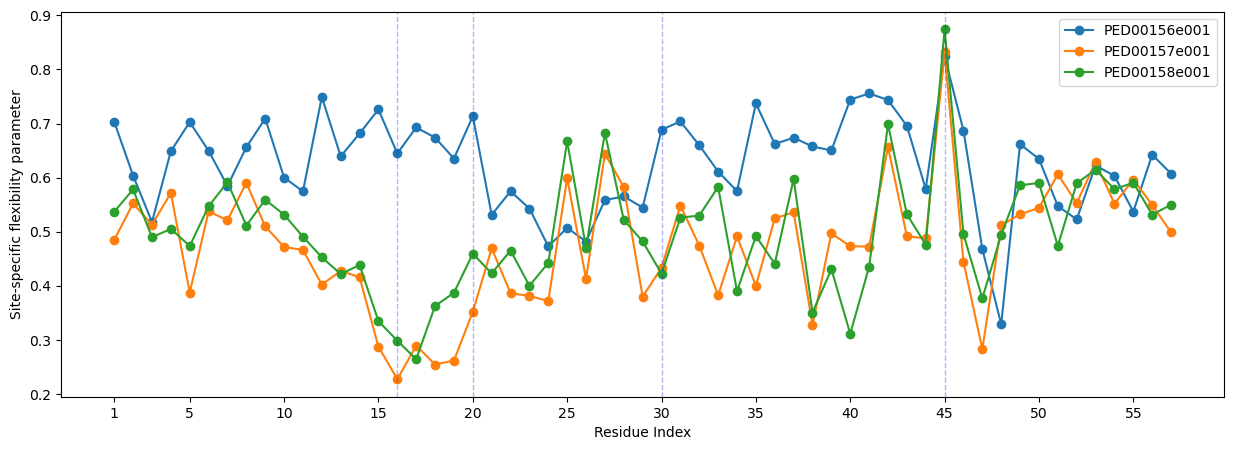

In [41]:
vis.ss_flexibility_parameter(pointer=[16,20,30,45])

#### 2D Ramachandran histograms:

Here we just simply visualize the 2D Ramachandran histogram to evaluate φ and ψ angles distributions

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00156e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00157e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00158e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

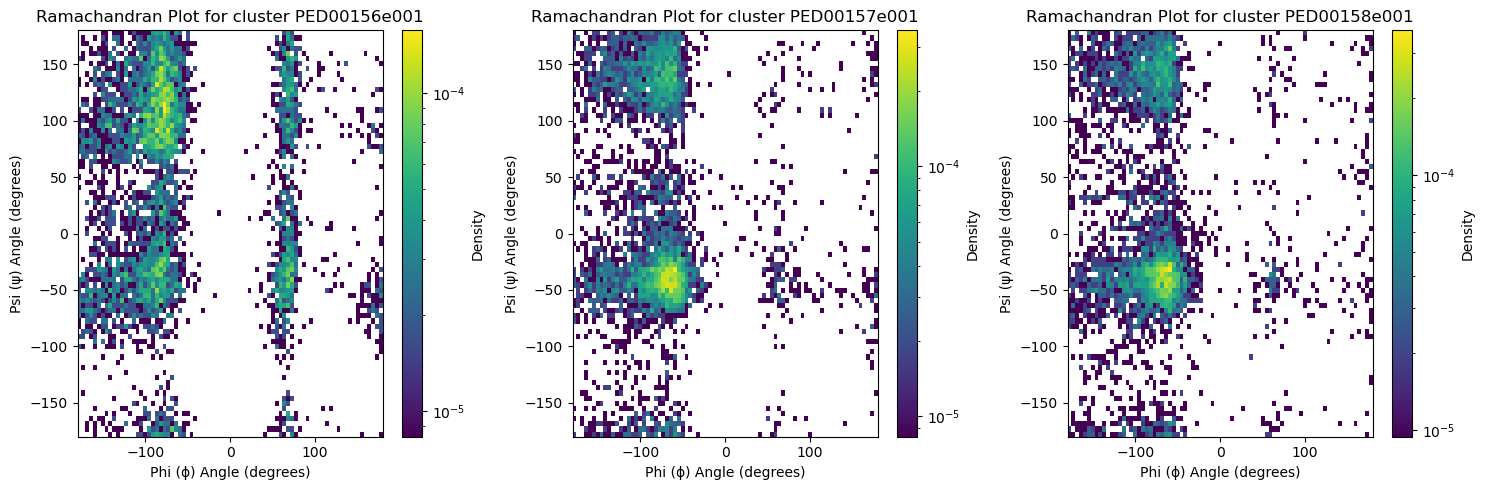

In [4]:
vis.ramachandran_plots(two_d_hist=True)

#### Alpha angle:

Alpha angle is the angle between the two hyperplanes made by four consecutive Carbon-alpha atoms and it is used to describe the geometric relationship between adjacent segments of the protein backbone. here we can visualize the distribution of alpha angles in the ensembles. We can clearly show here that based on alpha angles distributions how PED00156 is different from PED00157 and PED00158. 

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

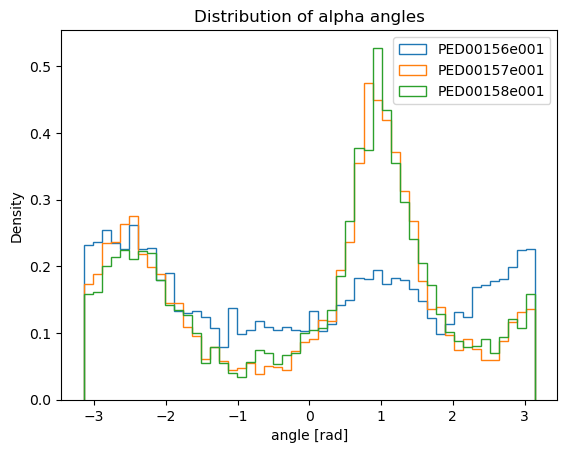

In [35]:
vis.alpha_angles()

## Ensemble Comparison Analysis:


Using IDPET package you will be able to perform pairwise compariosns between ensembles based on the two different divergence scores: Jensen-Shannon and Earth mover's distance. A complete documentation about the different parameters and methods are available in the documentaion for `EnsembleAnalysis.comparison_scores`.
These scores can measure the divergence based on the distributions of Ca distances and Alpha angles. 
The results clearly shows how these three ensembles different from each other. As it is expected, PED00156 is more diverged while PED00157 and PED00158 are more similar to each other. This is due to the mixed ensemble contains more conformations from ENSEMBLE pool than Random.  

# Scoring 'jsd' using features 'ca_dist'
- Number of bins for all comparisons: 10
- Will perform: 6 (pairs of ensembles) x 10 (iterations) = 60 (comparisons)
# Scoring 'jsd' using features 'alpha_angle'
- Number of bins for all comparisons: 10
- Will perform: 6 (pairs of ensembles) x 10 (iterations) = 60 (comparisons)


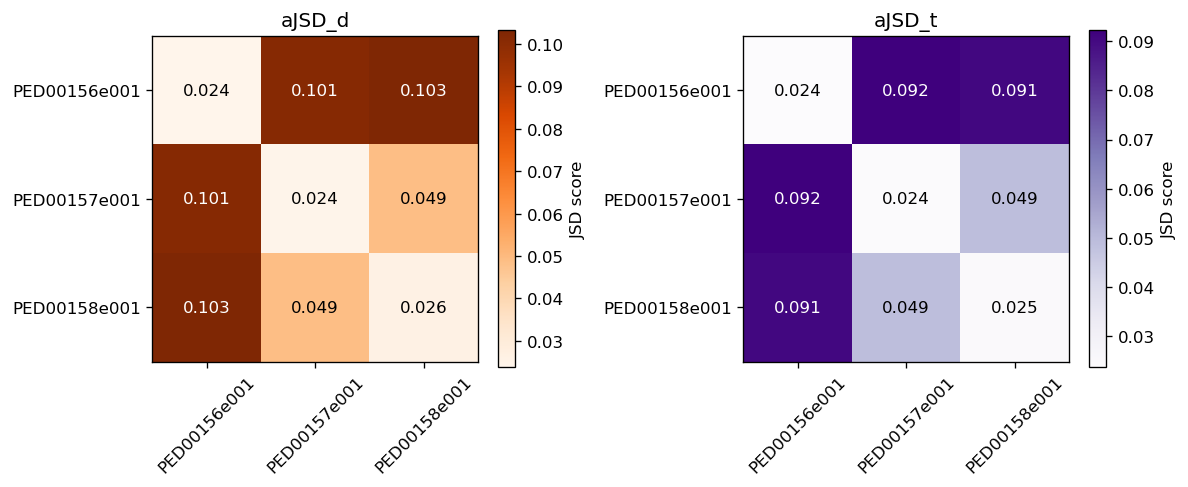

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10.0, 4), dpi=120) # making subplots to generate multiple ax figure

vis.comparison_matrix(
    score="jsd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=10,
    bins="auto",
    ax=ax[0], # using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=True
)

vis.comparison_matrix(
    score="jsd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=10,
    bins="auto",
    ax=ax[1],
    cmap="Purples",
    verbose=True
)
analysis.comparison_scores
plt.tight_layout()
plt.show()

## Dimensionality reduction Analysis:

Using IDPET `EnsembleAnalysis` module you can use dimensionality reduction methods to investigate more on the extracted local(phi-psi angles) and distance data(CA distances). Here we want to use t-SNE method to visualize the conformers in a 2D space based on selected features like Ca-distances or angles. Using this strategy we can provide more evidence regarding how these three ensembls are different from each other. 

### First step: Extract the feature on which you want to perform dimensionality reduction algorithm

In this step using `extract_features` method in the `EnsembleAnalysis` module you can first extract the desired feature. As you can see here we first select carbon alpha distances as our selected feature by putting `ca_dist` for the `featurization` parameter.  


In [16]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52'

{'PED00156e001': array([[0.62181395, 0.8748281 , 1.0244368 , ..., 0.5381905 , 0.65995586,
         0.5500405 ],
        [0.6740468 , 0.94238734, 1.2103361 , ..., 0.696765  , 0.7199101 ,
         0.5397694 ],
        [0.54331213, 0.5967415 , 0.8770647 , ..., 0.6101002 , 0.9751156 ,
         0.68294644],
        ...,
        [0.69683045, 0.88360864, 1.1769351 , ..., 0.5458644 , 0.8227767 ,
         0.53999794],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.5536332 , 0.6240836 , 0.865476  , ..., 0.65317243, 0.5724018 ,
         0.5386198 ]], dtype=float32),
 'PED00157e001': array([[0.5444462 , 0.7421228 , 0.8755765 , ..., 0.6166486 , 0.8442986 ,
         0.689368  ],
        [0.61922514, 0.89435095, 0.93977153, ..., 0.7174825 , 0.85039765,
         0.5540449 ],
        [0.69710505, 1.0575799 , 1.2049499 , ..., 0.57521105, 0.84521836,
         0.6335973 ],
        ...,
        [0.5811551 , 0.5352497 , 0.58276105, ..., 0.6435778 ,

### Second step: Perform dimensionality reduction algorithm using `reduce_features` method 

In this step using `reduce_features` method in `EnsembleAnalysis` module you will be able to reduce the dimensions of the extracted feature matrix. In this step based on the selected DM method you need to provide other hyperparameters. For instance for t-SNE a list of perplexity values, the number of k for k-means clustering should be defined. Furthermore to handle angular data you should change `circular` parameter ro `True`. A complete guide on different parameters is availbale on the documentation. 
IDPET also tries to cluster the conformations in the reduced space and it works based on k-means clustering and trying different hyperparameters such as different perplexity values and differen number for k to get the best silhouette score. 

In [31]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100], circular=False, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (288, 1653)
tsne is running...
Best Perplexity: 50
Best Number of Clusters: 3


array([[  6.7534776 ,   7.7137036 ],
       [  6.5788627 ,   8.910531  ],
       [  7.185751  ,   8.453437  ],
       [  8.353974  ,   7.6226826 ],
       [  7.610592  ,   9.136604  ],
       [  6.3888917 ,   8.171834  ],
       [  5.391902  ,   7.823018  ],
       [  6.8110886 ,   6.6145473 ],
       [  1.648991  ,   6.954205  ],
       [  6.7121997 ,   8.297391  ],
       [  6.288771  ,   7.3511767 ],
       [  7.6227536 ,   9.499806  ],
       [  8.635496  ,   7.07946   ],
       [  7.354987  ,   8.897425  ],
       [  6.1859503 ,   6.8507667 ],
       [  6.9095116 ,   8.79837   ],
       [  8.091247  ,   7.3461337 ],
       [  5.889528  ,   8.691315  ],
       [  5.6052923 ,   7.260075  ],
       [  7.6985664 ,   6.809431  ],
       [  7.7564607 ,   6.8938293 ],
       [  6.4682875 ,   3.6439598 ],
       [  5.474974  ,   8.036169  ],
       [  7.2398996 ,   3.2225723 ],
       [  7.135751  ,   2.4083548 ],
       [  6.861846  ,   3.20861   ],
       [  5.6354446 ,   6.504306  ],
 

### Third step: Visualization of conformations on the reduced 2D dimension based on the selected feature  

In this step using `dimensionality_reduction_scatter` method inside`Visualization` module we can represent the conformations in the reduced space with different labels. Original labels reflect the ensmble that each conformation belongs to. Clustering lables reflect the k-means clustering based on the best Silhouette score obtained by testing different perplexity and K values. Finally we have the possibility to represent the conformations using global labels like Rg, asphericity, SASA , etc. <br>

In this specific example, by focusing on the original labels plot and the density plot we can understand that how PED00157 and PED00158 conformations are similar based on Carbon alpha intera-atomic distances. The Rg labels plot demonstrates how reducing the dimensionality based on Cα (alpha carbon) distances can organize conformations from the lowest Rg (bottom left of the plot) to the highest Rg (top right of the plot). We can also acknowledge that some Random conformations (PED00156) are similar to the PED00158 and PED00157 conformation from the points of intera-atomic Cα distances. This confirms the fact that final Mixed (PED00158) ensemble contains 24% of Random pool confromations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


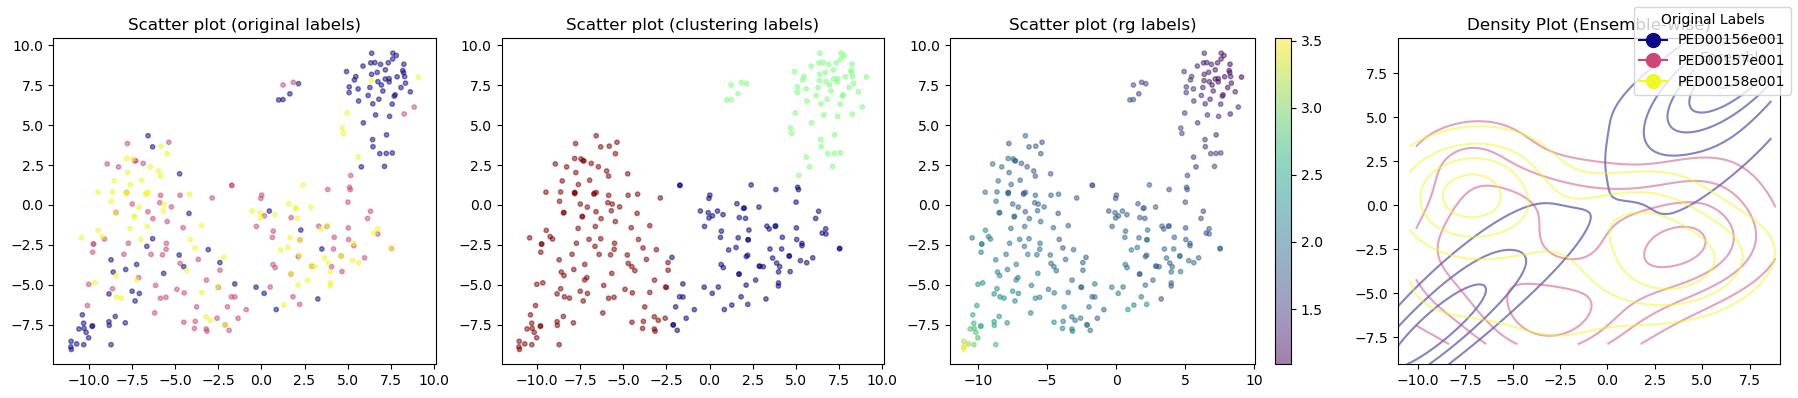

In [36]:
vis.dimensionality_reduction_scatter(color_by='rg', kde_by_ensemble=True)

### Last step: Repeating the dimensionality reduction analysis for phi-psi angles as the extracted features

Using this approach we can confirm again how dissimilar the random ensemble (PED00156) from PED00157 and PED00158

In [37]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 116)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 116)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 116)
Feature names: ['GLU2-PHI', 'ALA3-PHI', 'ILE4-PHI', 'ALA5-PHI', 'LYS6-PHI', 'HIS7-PHI', 'ASP8-PHI', 'PHE9-PHI', 'SER10-PHI', 'ALA11-PHI', 'THR12-PHI', 'ALA13-PHI', 'ASP14-PHI', 'ASP15-PHI', 'GLU16-PHI', 'LEU17-PHI', 'SER18-PHI', 'PHE19-PHI', 'ARG20-PHI', 'LYS21-PHI', 'THR22-PHI', 'GLN23-PHI', 'ILE24-PHI', 'LEU25-PHI', 'LYS26-PHI', 'ILE27-PHI', 'LEU28-PHI', 'ASN29-PHI', 'MET30-PHI', 'GLU31-PHI', 'ASP32-PHI', 'ASP33-PHI', 'SER34-PHI', 'ASN35-PHI', 'TRP36-PHI', 'TYR37-PHI', 'ARG38-PHI', 'ALA39-PHI', 'GLU40-PHI', 'LEU41-PHI', 'ASP42-PHI', 'GLY43-PHI', 'LYS44-PHI', 'GLU45-PHI', 'GLY46-PHI', 'LEU47-PHI', 'ILE48-PHI', 'PRO49-PHI', 'SER50-PHI', 'ASN51-PHI', 'TYR52-PHI', 'ILE53-PHI', 'GLU54-PHI', 'MET55-PHI', 

{'PED00156e001': array([[ 1.1577249 , -1.217782  , -1.2799942 , ...,  2.5013933 ,
         -0.20402087,  1.3094579 ],
        [ 1.2899319 , -2.3262308 , -1.172357  , ..., -1.4751793 ,
         -3.1351974 ,  1.2594489 ],
        [-1.1285951 , -1.292819  , -1.3119535 , ...,  2.067193  ,
          2.170035  ,  2.564002  ],
        ...,
        [-1.8687295 , -1.1213598 , -1.401682  , ...,  1.3203957 ,
          1.3073406 , -0.54799443],
        [-1.3948162 , -2.7970872 , -2.1043153 , ...,  2.10606   ,
         -0.5932995 , -1.2692754 ],
        [-1.5568932 , -1.4384656 , -1.2367293 , ..., -0.58454627,
         -1.4442189 , -0.16403243]], dtype=float32),
 'PED00157e001': array([[-1.1845857 , -1.162165  , -1.3434937 , ...,  2.500024  ,
          0.6335331 ,  2.0394802 ],
        [ 3.0242426 , -1.2952259 , -1.1229024 , ...,  2.4418864 ,
         -2.897522  , -0.66710645],
        [-2.8507354 , -2.7416358 , -1.2957426 , ..., -0.58928984,
          1.8301954 ,  2.174993  ],
        ...,
       

In [38]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (288, 116)
tsne is running...
Best Perplexity: 100
Best Number of Clusters: 2


array([[-1.5055676 ,  0.5844052 ],
       [-1.3572044 , -0.5286203 ],
       [ 1.0159236 , -0.8510137 ],
       [ 0.01869763, -1.8906057 ],
       [-1.6243001 , -0.4232523 ],
       [-1.6910847 ,  1.2703434 ],
       [-1.65808   , -0.0450063 ],
       [-0.5155085 , -0.8722752 ],
       [-0.9374041 ,  0.0746937 ],
       [ 2.0038679 , -1.085567  ],
       [ 0.89662546, -1.578942  ],
       [-0.13783006, -2.0011187 ],
       [-1.6924163 ,  0.6423537 ],
       [-1.5183698 , -0.26428866],
       [-0.03371444, -1.8842884 ],
       [-0.16171223, -1.8454546 ],
       [-0.89910984, -2.497547  ],
       [ 0.21533774, -0.8103682 ],
       [-1.0064328 , -0.71735823],
       [-1.8008201 , -1.0831773 ],
       [-1.876352  ,  0.8319832 ],
       [-1.2386891 , -0.79495263],
       [ 0.63772166, -2.3335774 ],
       [-1.2416809 , -0.00673281],
       [-1.043759  , -0.49365827],
       [ 0.04505169, -2.0262299 ],
       [-0.5454428 , -1.7771184 ],
       [-2.0391495 ,  0.01975488],
       [-0.7348119 ,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


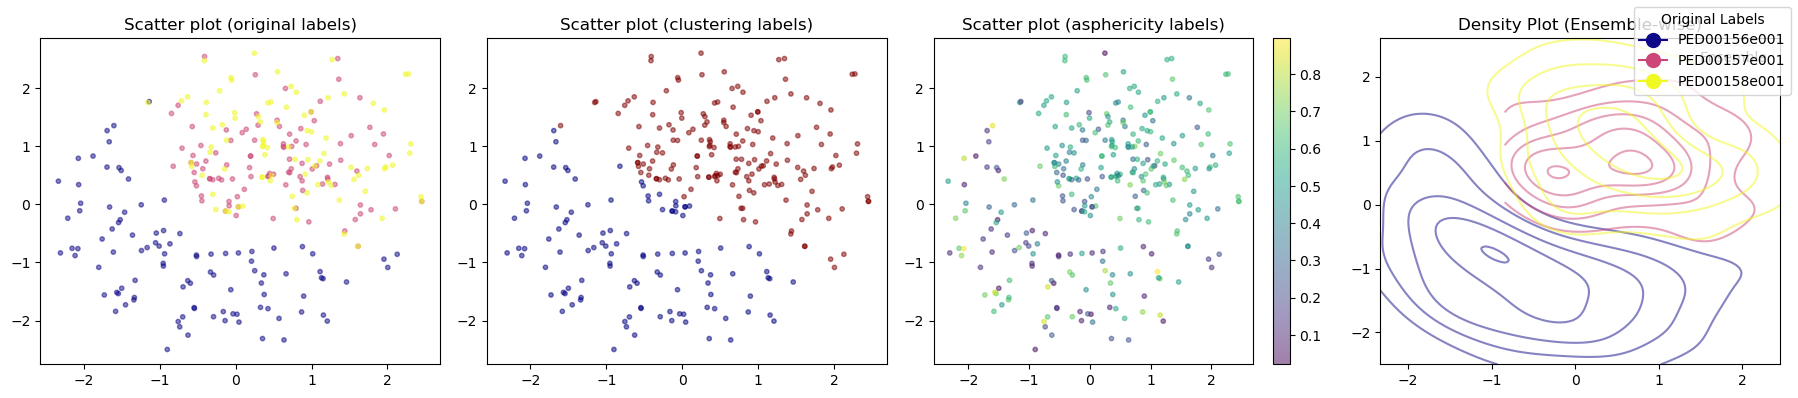

In [40]:
vis.dimensionality_reduction_scatter(color_by='asphericity', kde_by_ensemble=True)